<a href="https://colab.research.google.com/github/rithvik-yerramsetty/Pulses-Classifier/blob/master/dal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
path=Path(base_dir + 'data/dal')

In [0]:
doc(ImageDataBunch.from_folder)

In [0]:
np.random.seed(42)
data=ImageDataBunch.from_folder(path,train=".",valid_pct=0.2,
                                ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['black_gram', 'chick_pea', 'green_gram', 'pigeon_pea', 'ren_lentil']

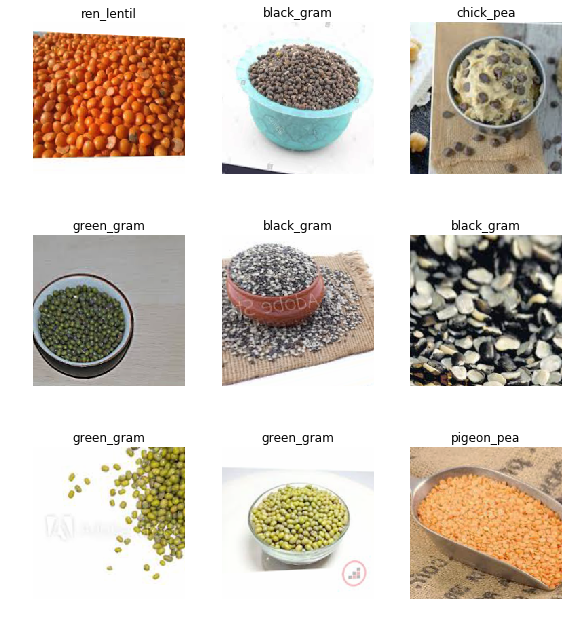

In [0]:
data.show_batch(rows=3,figsize=(8,9))

In [0]:
print(data.classes)
len(data.classes),data.c,len(data.train_ds),len(data.valid_ds)

['black_gram', 'chick_pea', 'green_gram', 'pigeon_pea', 'ren_lentil']


(5, 5, 461, 115)

In [0]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.164480,0.375760,0.121739,00:05
1,0.145468,0.373039,0.121739,00:05
2,0.130161,0.413544,0.121739,00:05
3,0.125773,0.406511,0.113043,00:06


In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

In [0]:
doc(interp.plot_top_losses)

In [0]:
interp.plot_top_losses(9,figsize=(14,15))

TypeError: ignored

In [0]:
from fastai.widgets import *
losses,idxs = interp.top_losses()
top_loss_paths = data.

In [0]:
??FileDeleter


Object `FileDeleter` not found.


In [0]:
fd = FileDeleter(file_paths = top_loss_paths)

NameError: ignored

In [0]:
doc(interp.plot_confusion_matrix)

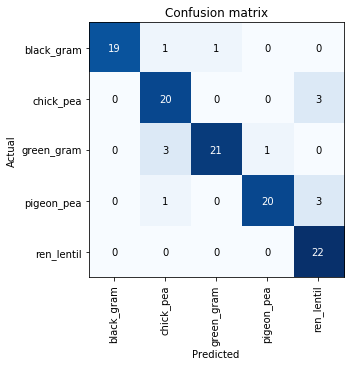

In [0]:
interp.plot_confusion_matrix(figsize=(5,5))

In [0]:
interp.most_confused(min_val=1)

[('chick_pea', 'ren_lentil', 3),
 ('green_gram', 'chick_pea', 3),
 ('pigeon_pea', 'ren_lentil', 3),
 ('black_gram', 'chick_pea', 1),
 ('black_gram', 'green_gram', 1),
 ('green_gram', 'pigeon_pea', 1),
 ('pigeon_pea', 'chick_pea', 1)]

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


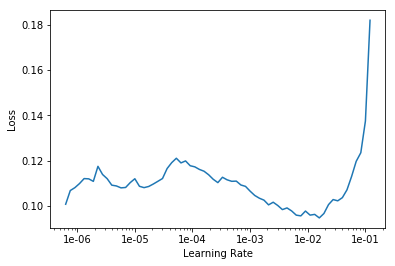

In [0]:
learn.recorder.plot()

In [0]:
doc(learn.unfreeze)

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.232949,0.404727,0.147826,00:05


In [0]:
learn.unfreeze()
learn.fit_one_cycle(3,max_lr=slice(9e-4,1.4e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.120575,0.423825,0.147826,00:06
1,0.103330,0.323365,0.078261,00:06
2,0.089842,0.274228,0.060870,00:06


In [0]:
learn.save('stage-4')